In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def generate_linear_data(n: int, d: int, sigma: float):
    X = np.random.randn(n, d)
    theta = np.random.normal(0, 1, d)
    theta = theta / np.linalg.norm(theta)
    y = (X @ theta) + np.random.normal(0, sigma, size=n)
    return X, y

def mse_loss(y_true: np.ndarray, y_pred: np.ndarray):
    assert len(y_true) == len(y_pred)
    return mean_squared_error(y_true, y_pred)


In [5]:
def linear_regression_soln(X_train, y_train, X_test, y_test):
    X_train_mean = np.mean(X_train, axis=0)
    X_train_std = np.std(X_train, axis=0)
    X_train = (X_train - X_train_mean) / X_train_std
    X_test = (X_test - X_train_mean) / X_train_std

    X_train_b = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test_b = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    XtX = np.dot(X_train_b.T, X_train_b)
    XtX_inv = np.linalg.inv(XtX)
    Xty = np.dot(X_train_b.T, y_train)
    weights = np.dot(XtX_inv, Xty)

    y_pred = np.dot(X_test_b, weights)
    mse_loss_linear_reg = np.mean((y_test - y_pred) ** 2)
    return mse_loss_linear_reg


In [7]:
def ridge_regression_soln(X_train, y_train, X_test, y_test, lamb):
    X_train_b = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test_b = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    d = X_train_b.shape[1]
    I = np.identity(d)

    XtX_reg = X_train_b.T @ X_train_b + lamb * I
    Xty = X_train_b.T @ y_train
    theta_opt = np.linalg.solve(XtX_reg, Xty)

    y_pred = np.dot(X_test_b, theta_opt)
    mse_loss_ridge_reg = np.mean((y_test - y_pred) ** 2)
    return mse_loss_ridge_reg


Linear Regression MSE: 3.4218402068142896e-31
Ridge Regression MSEs: [1.8522943928572486e-08, 4.6257509544501454e-07, 1.8478124960614903e-06, 4.570232118169141e-05, 0.00018038938392233076]


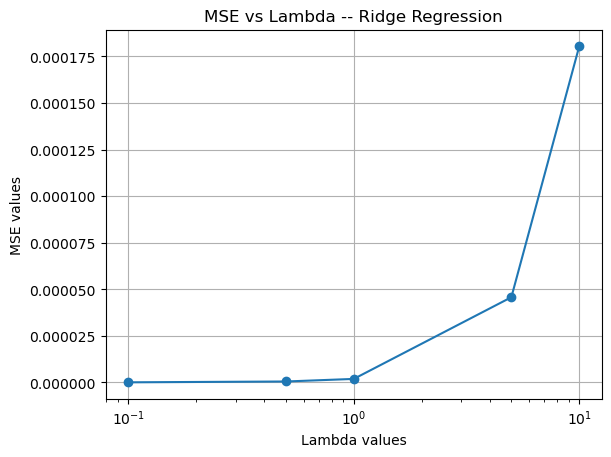

In [9]:
import matplotlib.pyplot as plt

X, y = generate_linear_data(n=1000, d=20, sigma=0.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

mse_loss_linear_reg = linear_regression_soln(X_train, y_train, X_test, y_test)
print("Linear Regression MSE:", mse_loss_linear_reg)

lambda_list = [0.1, 0.5, 1, 5, 10]
mse_list = []

for lamb in lambda_list:
    mse = ridge_regression_soln(X_train, y_train, X_test, y_test, lamb)
    mse_list.append(mse)

print("Ridge Regression MSEs:", mse_list)

plt.plot(lambda_list, mse_list, marker='o')
plt.xscale("log")
plt.xlabel("Lambda values")
plt.ylabel("MSE values")
plt.title("MSE vs Lambda -- Ridge Regression")
plt.grid(True)
plt.show()
